# WIN PREDICTION -FINAL PROJECT

In [1]:
# Importing Pandas and NumPy
import pandas as pd,numpy as np
import os
# Plot related packages
import matplotlib.pyplot as plt,seaborn as sns; sns.set()
%matplotlib inline


# Model Building related packages for Classification
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn import preprocessing #For scaling

from sklearn.preprocessing import LabelEncoder # Converting Categorical(text) to Categorical(numerical)

# PCA package
from sklearn.decomposition import PCA

# Metrics

from sklearn import metrics

# import package to avoid warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('D:\\R\\Python\\Win Prediction')

In [3]:
data = pd.read_excel("Win_Prediction_Data.xlsx")

In [4]:
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [79]:
data.columns

Index(['Client Category', 'Solution Type', 'Sector', 'Location', 'VP Name',
       'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

# STEP- 1 DATA CLEANING AND PREPROCESSING

In [5]:
data.tail()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won
10060,Others,Solution 9,2019-05-30,Sector 12,L10,Son Mcconnaughy,Tarun Garg,147058.82,Lost


In [6]:
data.shape # shape gives the no.of rows and columns(dimensions)

(10061, 9)

In [7]:
data.describe()#describe function fn gives max value,min value and percentile values,25%,50%,75%, mean, standard deviation.

,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


In [8]:
# checking number of features in the dataset
print(len(data))
print(len(data.columns))
# check the data type of each columns
print(data.dtypes)

10061
9
Client Category             object
Solution Type               object
Deal Date           datetime64[ns]
Sector                      object
Location                    object
VP Name                     object
Manager Name                object
Deal Cost                  float64
Deal Status Code            object
dtype: object


In [9]:
# Find the information of the raw dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [10]:
# Handling Missing Values
#checking for missing values
data.isnull().sum()# client category has 79 missing values

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [11]:
data.groupby('Client Category').size() # finding the most frequently used category and found it is "others=1763"

Client Category
Airpline                   27
Automobiles               178
Consulting                352
Consumer Good             185
Domestic Bank             134
Domestic Private Bank     262
Domestic Public Bank      419
Electronics                81
Energy                     57
Energy                     37
Finance                   339
Govt                      121
Govt Bank Special          41
Healthcare                 99
Holding                    25
Hospitality               119
Industries                 66
Infrastructure            152
Insurance                 247
Internal                 1454
International Bank        376
International Org          25
Knowledge                  50
Logistics                  20
Management                 43
Manufacturing             117
Media_Journal              71
Medical                     5
Others                   1763
Payment                    40
Pharma                    110
Power ind                 264
Real Estate             

In [12]:
data['Client Category'] = data['Client Category'].fillna('Others')# filling the missing values with "others" category

In [13]:
data.isnull().sum()# checking whether the missing value is filled # no missing data

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

In [14]:
#REMOVING THE DUPLICATE RECORDS
#checking for duplicate variable
duplicate = data.duplicated()
print('No Of Duplicate Variables:',duplicate.sum())
data[duplicate]# we see 14 duplicate variables

No Of Duplicate Variables: 14


,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
3036,Domestic Public Bank,Solution 32,2015-03-20,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,Lost
3385,Tech,Solution 32,2015-07-31,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,Lost
3880,Telecom,Solution 12,2013-08-30,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,Lost
5037,Tech,Solution 13,2012-05-08,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,Lost
7637,Govt,Solution 34,2018-02-21,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,Lost
7705,Internal,Solution 9,2015-01-06,Sector 20,Others,Sargar Deep Rao,Brenton Launius,2120294.12,Lost
7718,Services_based,Solution 26,2018-02-11,Sector 17,L10,Molly Eakes,vansu dev,264705.88,Lost
8020,Internal,Solution 9,2015-07-02,Sector 2,L9,Sargar Deep Rao,Rahul Kocher,264705.88,Lost
8167,Infrastructure,Solution 9,2015-05-18,Sector 24,L10,Mervin Harwood,nahar singh,352941.18,Lost
8177,Services_based,Solution 9,2015-10-03,Sector 23,L1,Ankita Aggarwal,bhagwati prasad,147058.82,Lost


In [15]:
data.drop_duplicates(inplace= True)# dropping the duplicate variable

In [16]:
duplicate = data.duplicated()
print('No Of Duplicate Variables:',duplicate.sum())
data[duplicate]# removed the duplicates

No Of Duplicate Variables: 0


,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code


# STEP- 2 LABEL ENCODING

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()# converting categorial variable into numeric variable

In [18]:
data['Client Category']= label_encoder.fit_transform(data['Client Category'])
data['Solution Type']= label_encoder.fit_transform(data['Solution Type'])
data['Sector']= label_encoder.fit_transform(data['Sector'])
data['Location']= label_encoder.fit_transform(data['Location'])
data['VP Name']= label_encoder.fit_transform(data['VP Name'])
data['Manager Name']= label_encoder.fit_transform(data['Manager Name'])
data['Deal Status Code']= label_encoder.fit_transform(data['Deal Status Code'])

In [19]:
data.drop(['Deal Date'], axis = 1,inplace= True)# non significant variable in terms of win and lose

In [75]:
data.tail(20)

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
10041,35,43,9,0,33,236,147058.82,1
10042,38,11,15,7,5,148,102941.18,1
10043,38,33,6,7,29,3,73529.41,1
10044,18,66,7,7,9,23,701470.59,0
10045,28,66,3,1,34,216,147058.82,0
10046,20,66,8,1,30,17,383823.53,0
10047,19,25,15,1,12,264,55000.00,1
10048,18,66,7,7,9,23,701470.59,0
10049,10,30,8,1,3,189,470588.24,1
10050,28,25,15,6,8,172,882352.94,1


NameError: name 'columns' is not defined

# STEP - 3 EXPLORATORY DATA ANALYSIS

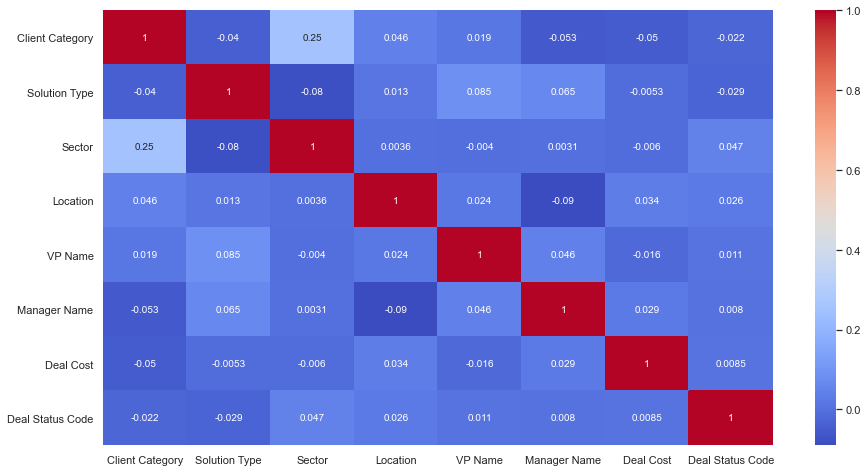

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

In [22]:
# Checking for corelation
data.corr()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
Client Category,1.000000,-0.039711,0.252742,0.046267,0.018707,-0.053043,-0.050445,-0.021917
Solution Type,-0.039711,1.000000,-0.079879,0.012937,0.085307,0.065057,-0.005323,-0.029242
Sector,0.252742,-0.079879,1.000000,0.003613,-0.003995,0.003112,-0.005976,0.046717
Location,0.046267,0.012937,0.003613,1.000000,0.024489,-0.089590,0.034378,0.025656
VP Name,0.018707,0.085307,-0.003995,0.024489,1.000000,0.045531,-0.015719,0.011300
Manager Name,-0.053043,0.065057,0.003112,-0.089590,0.045531,1.000000,0.028775,0.008034
Deal Cost,-0.050445,-0.005323,-0.005976,0.034378,-0.015719,0.028775,1.000000,0.008474
Deal Status Code,-0.021917,-0.029242,0.046717,0.025656,0.011300,0.008034,0.008474,1.000000


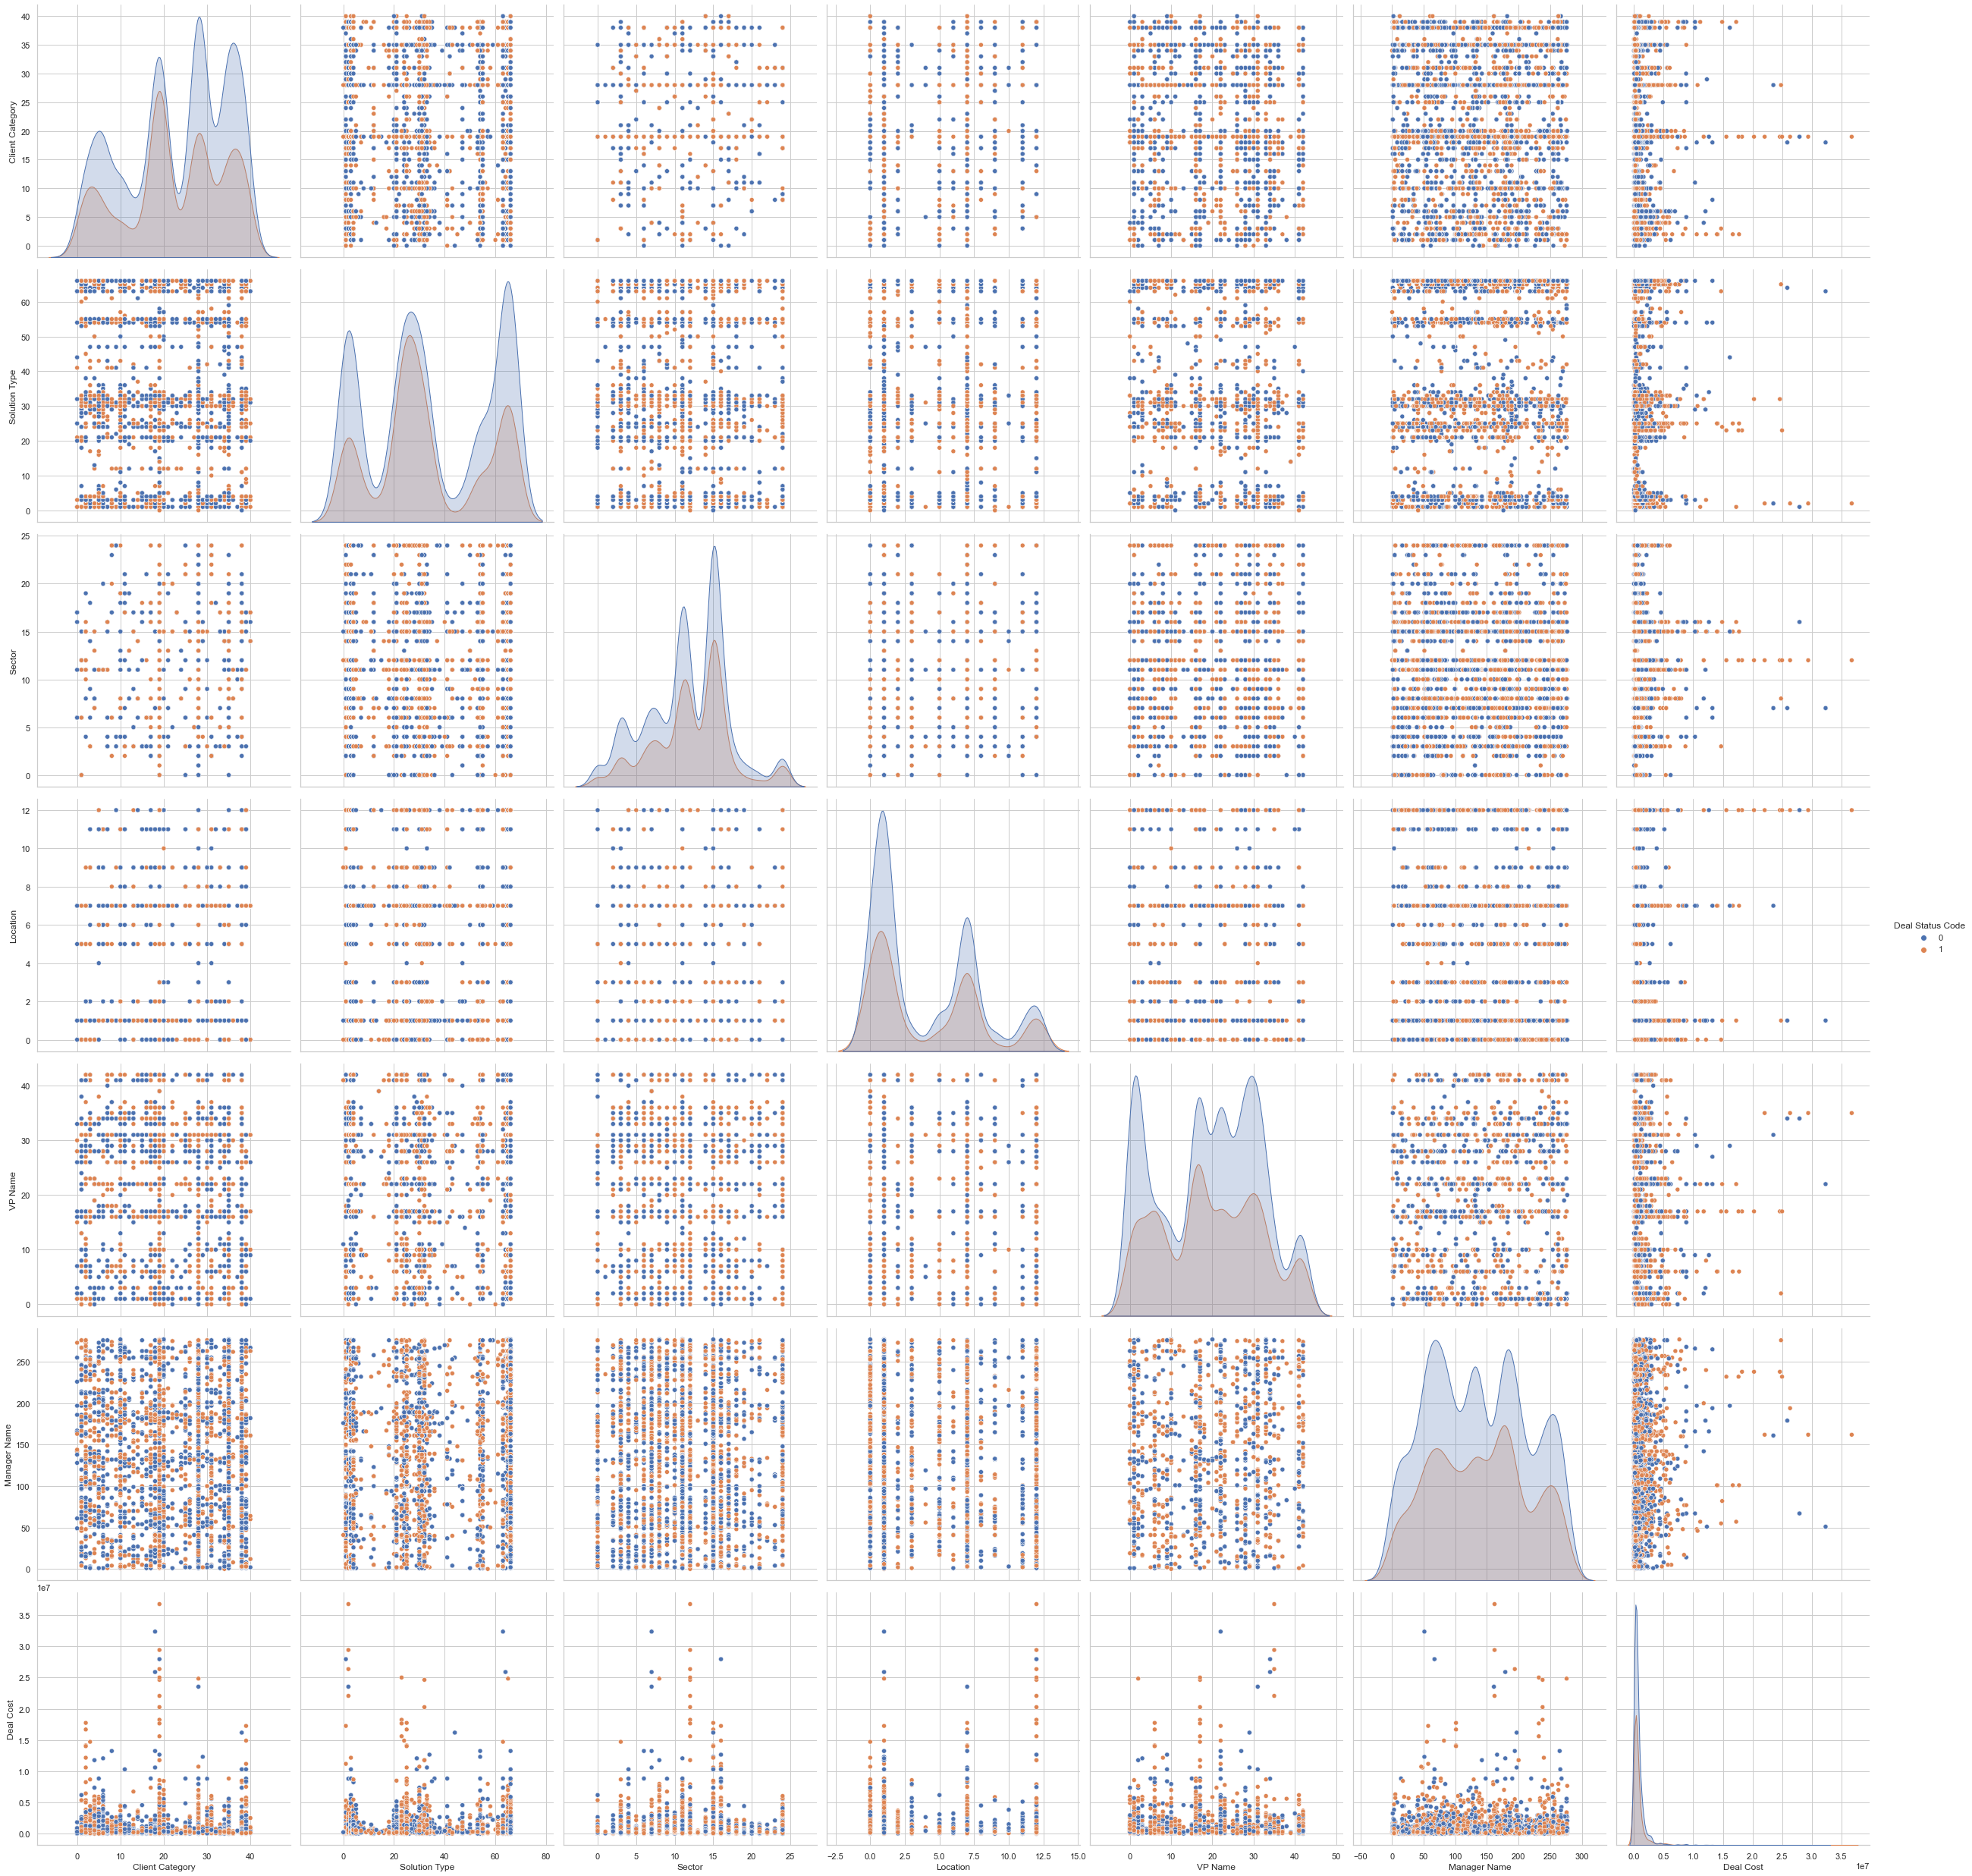

In [23]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="Deal Status Code", size=5);
plt.show()

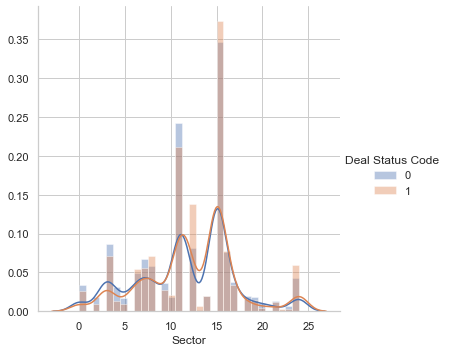

In [24]:
sns.FacetGrid(data, hue="Deal Status Code", size=5) \
   .map(sns.distplot, "Sector") \
   .add_legend();
plt.show();

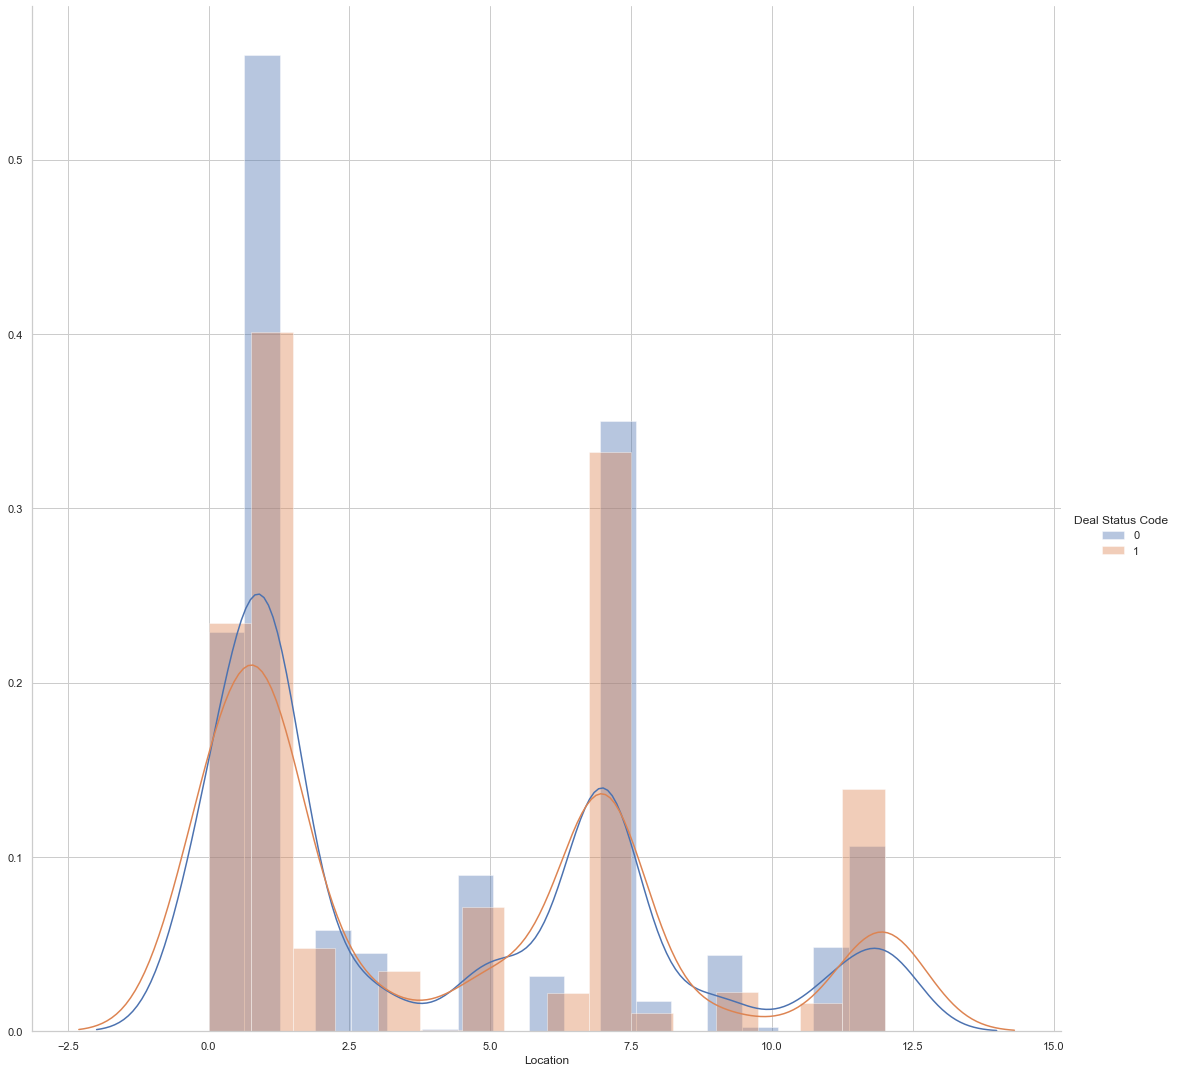

In [25]:
sns.FacetGrid(data, hue="Deal Status Code", size=15) \
   .map(sns.distplot, "Location") \
   .add_legend();
plt.show();

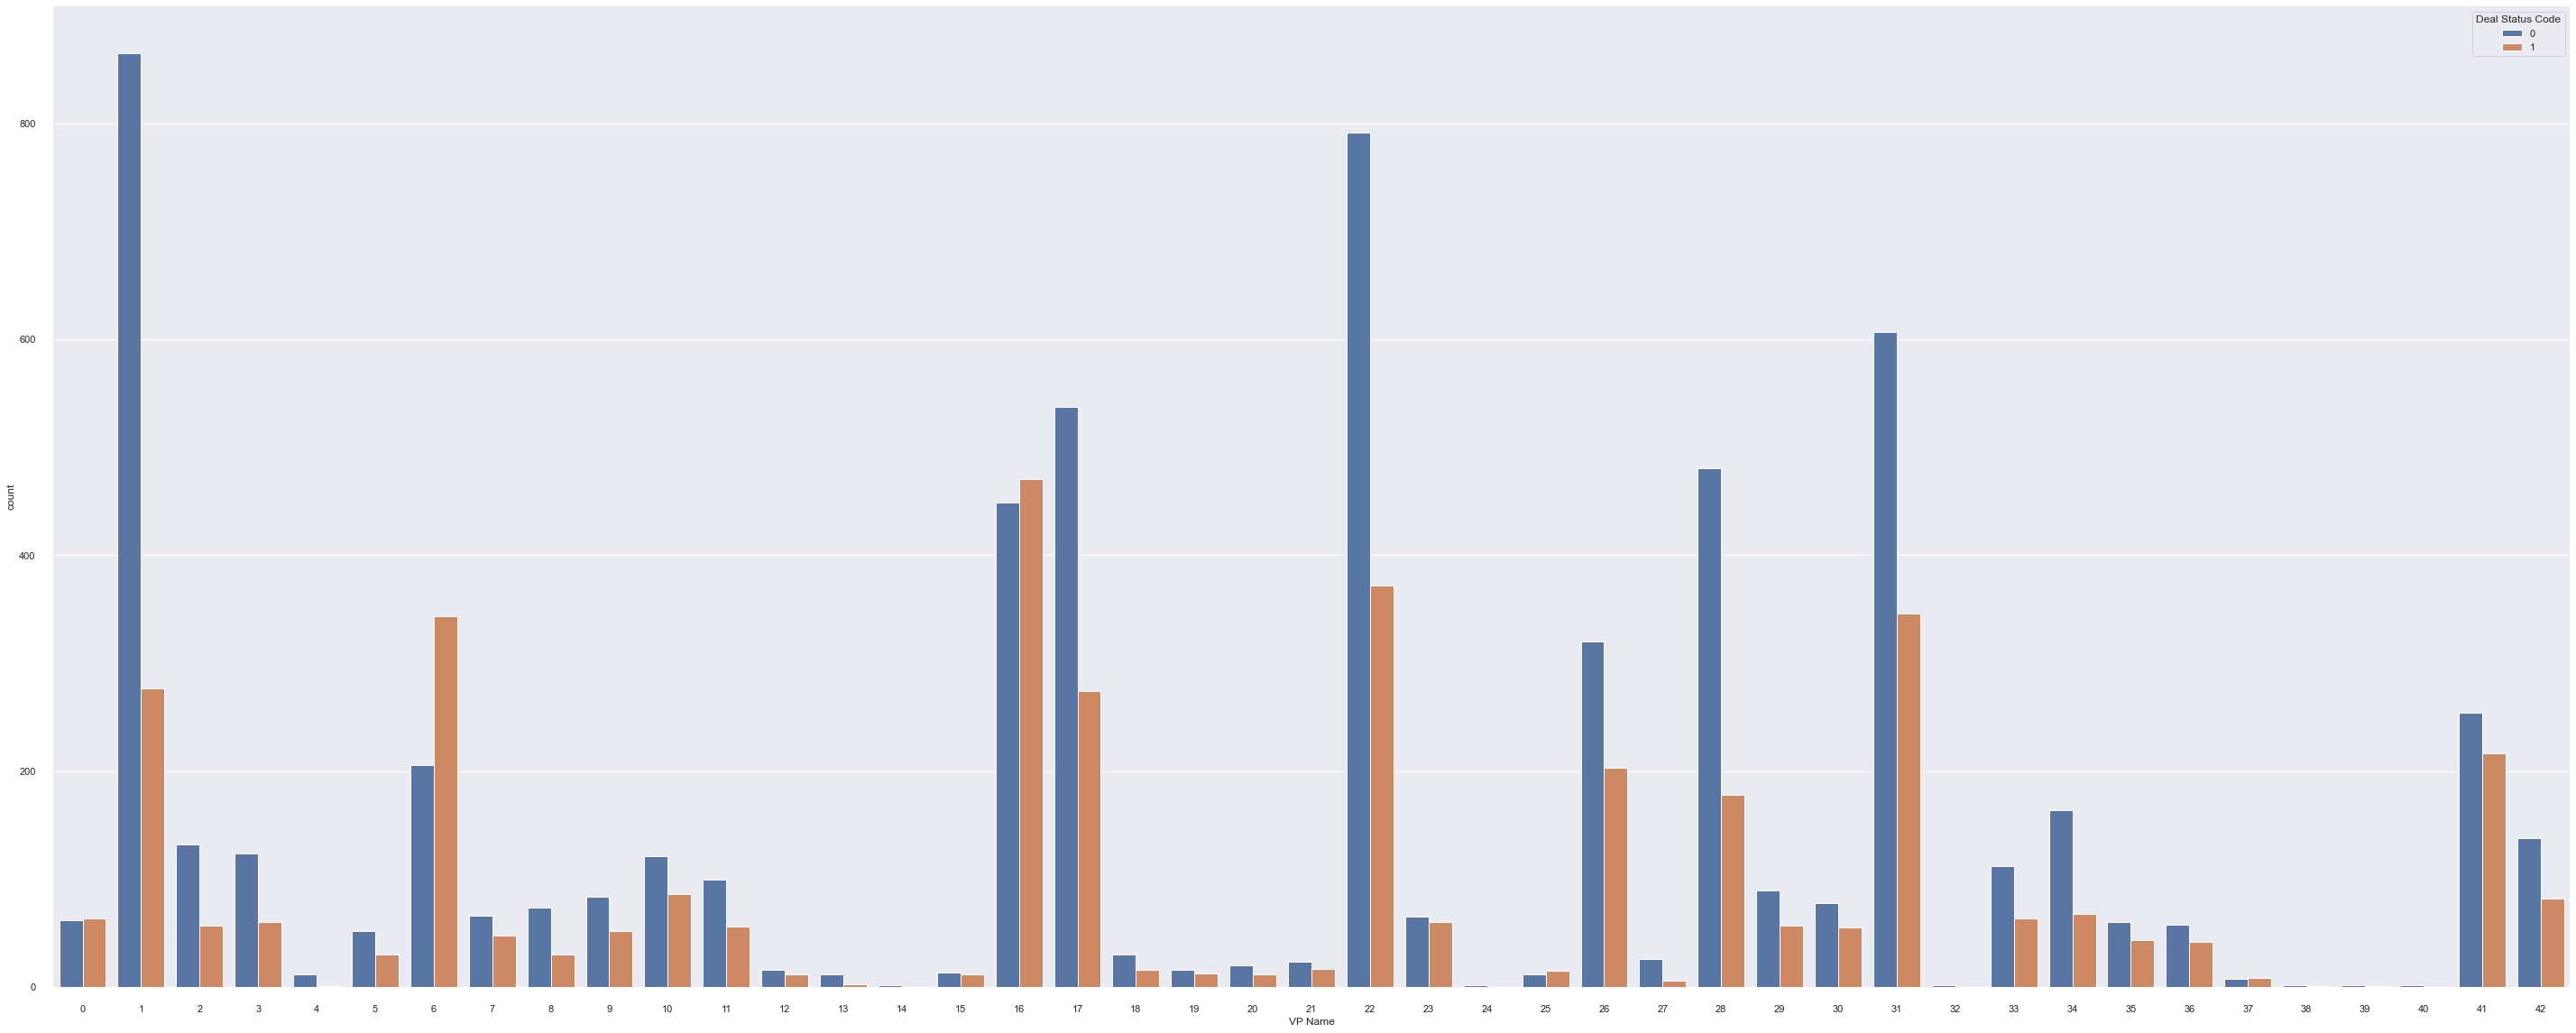

In [26]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(50,20)})
sns.countplot('VP Name',data=data,hue = 'Deal Status Code')
sns.despine(offset = 10,trim = True)

# STEP - 4 SPLIT THE DATA INTO IDV AND DV

In [27]:
X = data.drop(['Deal Status Code'],1)# independent variable as x
y = data['Deal Status Code']# dependent variable as y

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0) 

In [29]:
log_model_SL = LogisticRegression()  
log_model_SL.fit(X_train, y_train)

log_model_pr = log_model_SL.predict(X_test) 
log_test_accuracy=metrics.accuracy_score(y_test,log_model_pr)
log_training_accuracy=log_model_SL.score(X_train, y_train)


print("Test Accuracy for log_model_SL:\t",log_test_accuracy)
print()
print("Training Accuracy for log_model_SL:\t",log_training_accuracy)

Test Accuracy for log_model_SL:	 0.6165837479270315

Training Accuracy for log_model_SL:	 0.6304038680318543


In [30]:
#0.6165837479270315 accuracy for logistic regression model

In [31]:
KNN_model_SL = KNeighborsClassifier()  
KNN_model_SL.fit(X_train, y_train)

KNN_model_pr = KNN_model_SL.predict(X_test) 
KNN_test_accuracy=metrics.accuracy_score(y_test,KNN_model_pr)
KNN_training_accuracy=KNN_model_SL.score(X_train, y_train)
KNN_model_precesion = metrics.precision_score(y_test,KNN_model_pr)

print("Test Accuracy for KNN_model_SL:\t",KNN_test_accuracy)
print()
print("Training Accuracy for KNN_model_SL:\t",KNN_training_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,KNN_model_pr))
print()
print("\nPrecision Score:\n\n",KNN_model_precesion)

Test Accuracy for KNN_model_SL:	 0.6540630182421228

Training Accuracy for KNN_model_SL:	 0.7778725824800911

Confusion Matirx:

 [[1457  402]
 [ 641  515]]


Precision Score:

 0.5616139585605234


In [32]:
#KNN model gives 0.6527363184079602

In [33]:
# Decision Tree model

tree_model_SL = DecisionTreeClassifier()  
tree_model_SL.fit(X_train, y_train)

tree_model_pr = tree_model_SL.predict(X_test) 
tree_model_test_accuracy=metrics.accuracy_score(y_test,tree_model_pr)
tree_model_training_accuracy=tree_model_SL.score(X_train, y_train)
tree_model_precesion = metrics.precision_score(y_test,tree_model_pr)


print("Test Accuracy for tree_model_SL:\n",tree_model_test_accuracy)
print()
print("Training Accuracy for tree_model_SL:\n",tree_model_training_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,tree_model_pr))
print()
print("\nPrecision Score:\n\n",tree_model_precesion)

Test Accuracy for tree_model_SL:
 0.7830845771144279

Training Accuracy for tree_model_SL:
 0.998151308304892

Confusion Matirx:

 [[1649  210]
 [ 444  712]]


Precision Score:

 0.7722342733188721


In [34]:
# Decision tree accuracy  0.7830845771144279

In [35]:
# Random Forest model
random_model_SL = RandomForestClassifier()  
random_model_SL.fit(X_train, y_train)

random_SL_pr = random_model_SL.predict(X_test) 
random_model_SL_test_accuracy=metrics.accuracy_score(y_test,random_SL_pr)
random_model_SL_training_accuracy=random_model_SL.score(X_train, y_train)
random_model_SL_precesion = metrics.precision_score(y_test,random_SL_pr)

print("Test Accuracy for random_model_SL:\n",random_model_SL_test_accuracy)
print()
print("Training Accuracy for random_model_SL:\n",random_model_SL_training_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,random_SL_pr))
print()
print("\nPrecision Score:\n\n",random_model_SL_precesion)

Test Accuracy for random_model_SL:
 0.7927031509121062

Training Accuracy for random_model_SL:
 0.998151308304892

Confusion Matirx:

 [[1737  122]
 [ 503  653]]


Precision Score:

 0.8425806451612903


In [36]:
#Random Forest accuracy  - 0.7970646766169154

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[1732  127]
 [ 549  607]]
0.775787728026534
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1859
           1       0.83      0.53      0.64      1156

    accuracy                           0.78      3015
   macro avg       0.79      0.73      0.74      3015
weighted avg       0.79      0.78      0.76      3015



In [39]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,
                             criterion='entropy',
                             max_features='sqrt',
                             min_samples_leaf=10,
            random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[1715  144]
 [ 677  479]]
0.7276948590381426
              precision    recall  f1-score   support

           0       0.72      0.92      0.81      1859
           1       0.77      0.41      0.54      1156

    accuracy                           0.73      3015
   macro avg       0.74      0.67      0.67      3015
weighted avg       0.74      0.73      0.70      3015



In [40]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in 
        np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,7,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [41]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,n_iter=100,
                               cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [42]:
rf_randomcv.best_params_
rf_randomcv
rf_randomcv.best_estimator_
best_random_grid=rf_randomcv.best_estimator_

In [43]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1739  120]
 [ 497  659]]
Accuracy Score 0.7953565505804312
Classification report:               precision    recall  f1-score   support

           0       0.78      0.94      0.85      1859
           1       0.85      0.57      0.68      1156

    accuracy                           0.80      3015
   macro avg       0.81      0.75      0.77      3015
weighted avg       0.80      0.80      0.78      3015



In [44]:
#Randomsearchcv accuracy = 0.7963

In [45]:
#GRIDSEARCHCV
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 120,
 'criterion': 'gini'}

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 150, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [120], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [1, 2, 3, 4, 5], 'n_estimators': [250, 300, 400, 500, 600]}


In [47]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 15.3min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [120],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [250, 300, 400, 500, 600]},
             verbose=2)

In [48]:
grid_search.best_estimator_
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=120, n_estimators=500)

In [49]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1744  115]
 [ 494  662]]
Accuracy Score 0.7980099502487562
Classification report:               precision    recall  f1-score   support

           0       0.78      0.94      0.85      1859
           1       0.85      0.57      0.68      1156

    accuracy                           0.80      3015
   macro avg       0.82      0.76      0.77      3015
weighted avg       0.81      0.80      0.79      3015



# STEP - 5 RECOMMENDATIONS 

In [52]:
df = pd.read_excel("Win_Prediction_Data.xlsx")

In [53]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [54]:
df['win_cnt'] = np.where( df['Deal Status Code']=='Won',1,0)

In [55]:
df['loss_Cnt'] = np.where( df['Deal Status Code']=='Lost',1,0)

In [56]:
df['win_cost'] = np.where( df['Deal Status Code']=='Won',df['Deal Cost'],0)

In [57]:
df['lost_cost'] = np.where( df['Deal Status Code']=='Lost',df['Deal Cost'],0)

In [58]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,win_cnt,loss_Cnt,win_cost,lost_cost
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,1,0,150000.00,0.00
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,1,0,744705.88,0.00
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0,1,0.00,60000.00
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0,1,0.00,60000.00
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,0,1,0.00,80882.35


In [59]:
df['Win_gp']= df.groupby(['VP Name','Manager Name'])['win_cnt'].transform('sum')

In [60]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,win_cnt,loss_Cnt,win_cost,lost_cost,Win_gp
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,1,0,150000.00,0.00,17
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,1,0,744705.88,0.00,17
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0,1,0.00,60000.00,0
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0,1,0.00,60000.00,0
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,0,1,0.00,80882.35,0


In [61]:
df['Loss_gp']= df.groupby(['VP Name','Manager Name'])['loss_Cnt'].transform('sum')
df['L_cost']= df.groupby(['VP Name','Manager Name'])['lost_cost'].transform('sum')
df['W_cost']= df.groupby(['VP Name','Manager Name'])['win_cost'].transform('sum')
df.drop_duplicates(['VP Name','Manager Name'],keep ='first',inplace =True)


In [62]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,win_cnt,loss_Cnt,win_cost,lost_cost,Win_gp,Loss_gp,L_cost,W_cost
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,1,0,150000.00,0.00,17,16,17973529.44,20430000.02
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,0,1,0.00,60000.00,0,4,281764.70,0.00
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won,1,0,526176.47,0.00,6,0,0.00,2408529.42
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost,0,1,0.00,409705.88,23,56,16951176.48,7149411.79
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won,1,0,1032352.94,0.00,6,0,0.00,2708823.53


In [63]:
df.drop(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location', 'Deal Cost', 'Deal Status Code', 'win_cnt',
       'loss_Cnt', 'win_cost', 'lost_cost'],1,inplace = True)

In [64]:
df.head()

,VP Name,Manager Name,Win_gp,Loss_gp,L_cost,W_cost
0,Ekta Zutshi,Gopa Trilochana,17,16,17973529.44,20430000.02
2,Ekta Zutshi,Russell Dahlen,0,4,281764.70,0.00
6,Mervin Harwood,rahul sharma,6,0,0.00,2408529.42
7,Sargar Deep Rao,Vidur Hukle,23,56,16951176.48,7149411.79
8,Lilli Storrs,Md. Daud,6,0,0.00,2708823.53


In [65]:
df.sort_values(by = ['Win_gp','Loss_gp'],ascending=False,inplace = True)
df.head()#  top 5 vp and manager combination who has highest won rate & lost rate

,VP Name,Manager Name,Win_gp,Loss_gp,L_cost,W_cost
128,Long Bergstrom,Russell Dahlen,75,30,21835294.12,63152352.92
575,Rahul Bajpai,Rudraksh Sharma,72,126,84936470.66,33757647.04
1447,neeraj kumar,Molly Eakes,62,82,34177647.10,49031176.49
759,Ankita Aggarwal,Desmond Krout,53,160,81745882.44,13502941.23
1630,neeraj kumar,Vinay Kumar,51,24,11206470.60,37502941.15


In [66]:
df['Win_percentage'] = round(df['Win_gp']/(df['Win_gp']+df['Loss_gp'])*100,2)

In [67]:
df.head()# based on won and loss we have found the percentage of it

,VP Name,Manager Name,Win_gp,Loss_gp,L_cost,W_cost,Win_percentage
128,Long Bergstrom,Russell Dahlen,75,30,21835294.12,63152352.92,71.43
575,Rahul Bajpai,Rudraksh Sharma,72,126,84936470.66,33757647.04,36.36
1447,neeraj kumar,Molly Eakes,62,82,34177647.10,49031176.49,43.06
759,Ankita Aggarwal,Desmond Krout,53,160,81745882.44,13502941.23,24.88
1630,neeraj kumar,Vinay Kumar,51,24,11206470.60,37502941.15,68.00


In [68]:
df['Deal_count'] = df['Win_gp']+df['Loss_gp']
df['deal_cost'] = df['W_cost']+df['L_cost']
df.sort_values(by = ['Win_percentage','Deal_count','deal_cost','Win_gp'],ascending=False,inplace = True)
df.head()#combination that shows only the winning possibilty

,VP Name,Manager Name,Win_gp,Loss_gp,L_cost,W_cost,Win_percentage,Deal_count,deal_cost
9014,neeraj kumar,gurmit singh,18,0,0.0,15017647.06,100.0,18,15017647.06
7702,Rudraksh Sharma,Preetan Gujar,10,0,0.0,10281764.71,100.0,10,10281764.71
68,Ekta Zutshi,Ekta Zutshi,10,0,0.0,2695000.00,100.0,10,2695000.00
9404,Russell Dahlen,Martin Cheyne,10,0,0.0,117647.10,100.0,10,117647.10
5318,som dutt,Roop Sachdeva,9,0,0.0,302352.94,100.0,9,302352.94


In [69]:
df_1=df.copy()

In [70]:
df_1['Loss_percentage'] = round(df_1['Loss_gp']/(df_1['Deal_count'])*100,2)

In [71]:
df_1.sort_values(by = ['Loss_percentage','Deal_count','deal_cost','Loss_gp'],ascending=False,inplace = True)

In [72]:
df_1.head()# combination that shows only the lost possibility 

,VP Name,Manager Name,Win_gp,Loss_gp,L_cost,W_cost,Win_percentage,Deal_count,deal_cost,Loss_percentage
1105,Ankita Aggarwal,Annamaria Phung,0,16,1591764.72,0.0,0.0,16,1591764.72,100.0
13,Ekta Zutshi,shafibul,0,10,33235294.10,0.0,0.0,10,33235294.10,100.0
8195,Alam Syed,jamil khan,0,10,9411764.72,0.0,0.0,10,9411764.72,100.0
8471,Rudraksh Sharma,Prakash Srinivas,0,10,6352941.18,0.0,0.0,10,6352941.18,100.0
1745,Brendon Wycoff,Chloe Beiler,0,10,6058823.54,0.0,0.0,10,6058823.54,100.0
